# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PF,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 128,
  "PH2" : True,
  "PH3" : True,
  "reducer" : sup.PH3_REDUCER_NAME_PCA,
  "kernel" : '',
  "n" : 15,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 2500
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,class_numeric
0,-6.173517,5.814891,-2.112251,-0.276642,-0.479390,1.002511,-0.049623,0.000958,0.177771,-0.698954,0.365143,-0.055452,-0.972214,-0.414911,0.107038,28
2,-6.097311,5.764245,-2.231986,-0.044107,-0.647528,1.056509,0.177918,0.091343,0.296175,-0.720453,0.353450,-0.077283,-1.053536,-0.407167,0.075851,28
4,-6.166299,5.648430,-2.193391,-0.252598,-0.451304,1.081282,0.183444,-0.048881,0.268458,-0.855947,0.291151,-0.024683,-1.018534,-0.404535,0.072378,28
7,-6.418298,5.776106,-2.209392,0.129954,-0.861142,1.196524,0.399334,0.240467,0.379519,-0.646372,0.443488,-0.158074,-1.122485,-0.363618,0.056319,28
8,-6.085331,5.762245,-2.236102,-0.128476,-0.531019,1.153731,0.416514,-0.103213,0.328523,-0.960974,0.245241,-0.035182,-1.070170,-0.424015,0.047893,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91742,-2.727718,5.815464,6.552688,0.394781,-0.773642,-0.628575,1.465372,0.469098,0.234684,-0.348453,0.095211,-0.103425,-0.092285,0.001333,-0.017369,27
91744,-3.349561,5.453964,7.019700,0.236650,-0.659135,-0.736002,1.839269,0.439763,0.372845,-0.383753,0.172452,-0.106884,-0.122684,-0.017087,-0.061011,27
91746,-3.080768,5.209176,6.414966,0.661524,-0.567303,-0.869353,1.651209,0.440972,0.363696,-0.193510,0.031292,0.002100,-0.123519,-0.079790,-0.090520,27
91747,-2.289559,4.734357,5.192806,1.164701,-0.732518,-0.656284,1.054250,0.621575,0.043867,0.086929,-0.081149,0.159188,-0.112201,-0.111811,-0.073971,27


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.8883904731389511
0.9511908576311011
0.8884318402021697
0.8888463510470578
0.8887759917908131


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


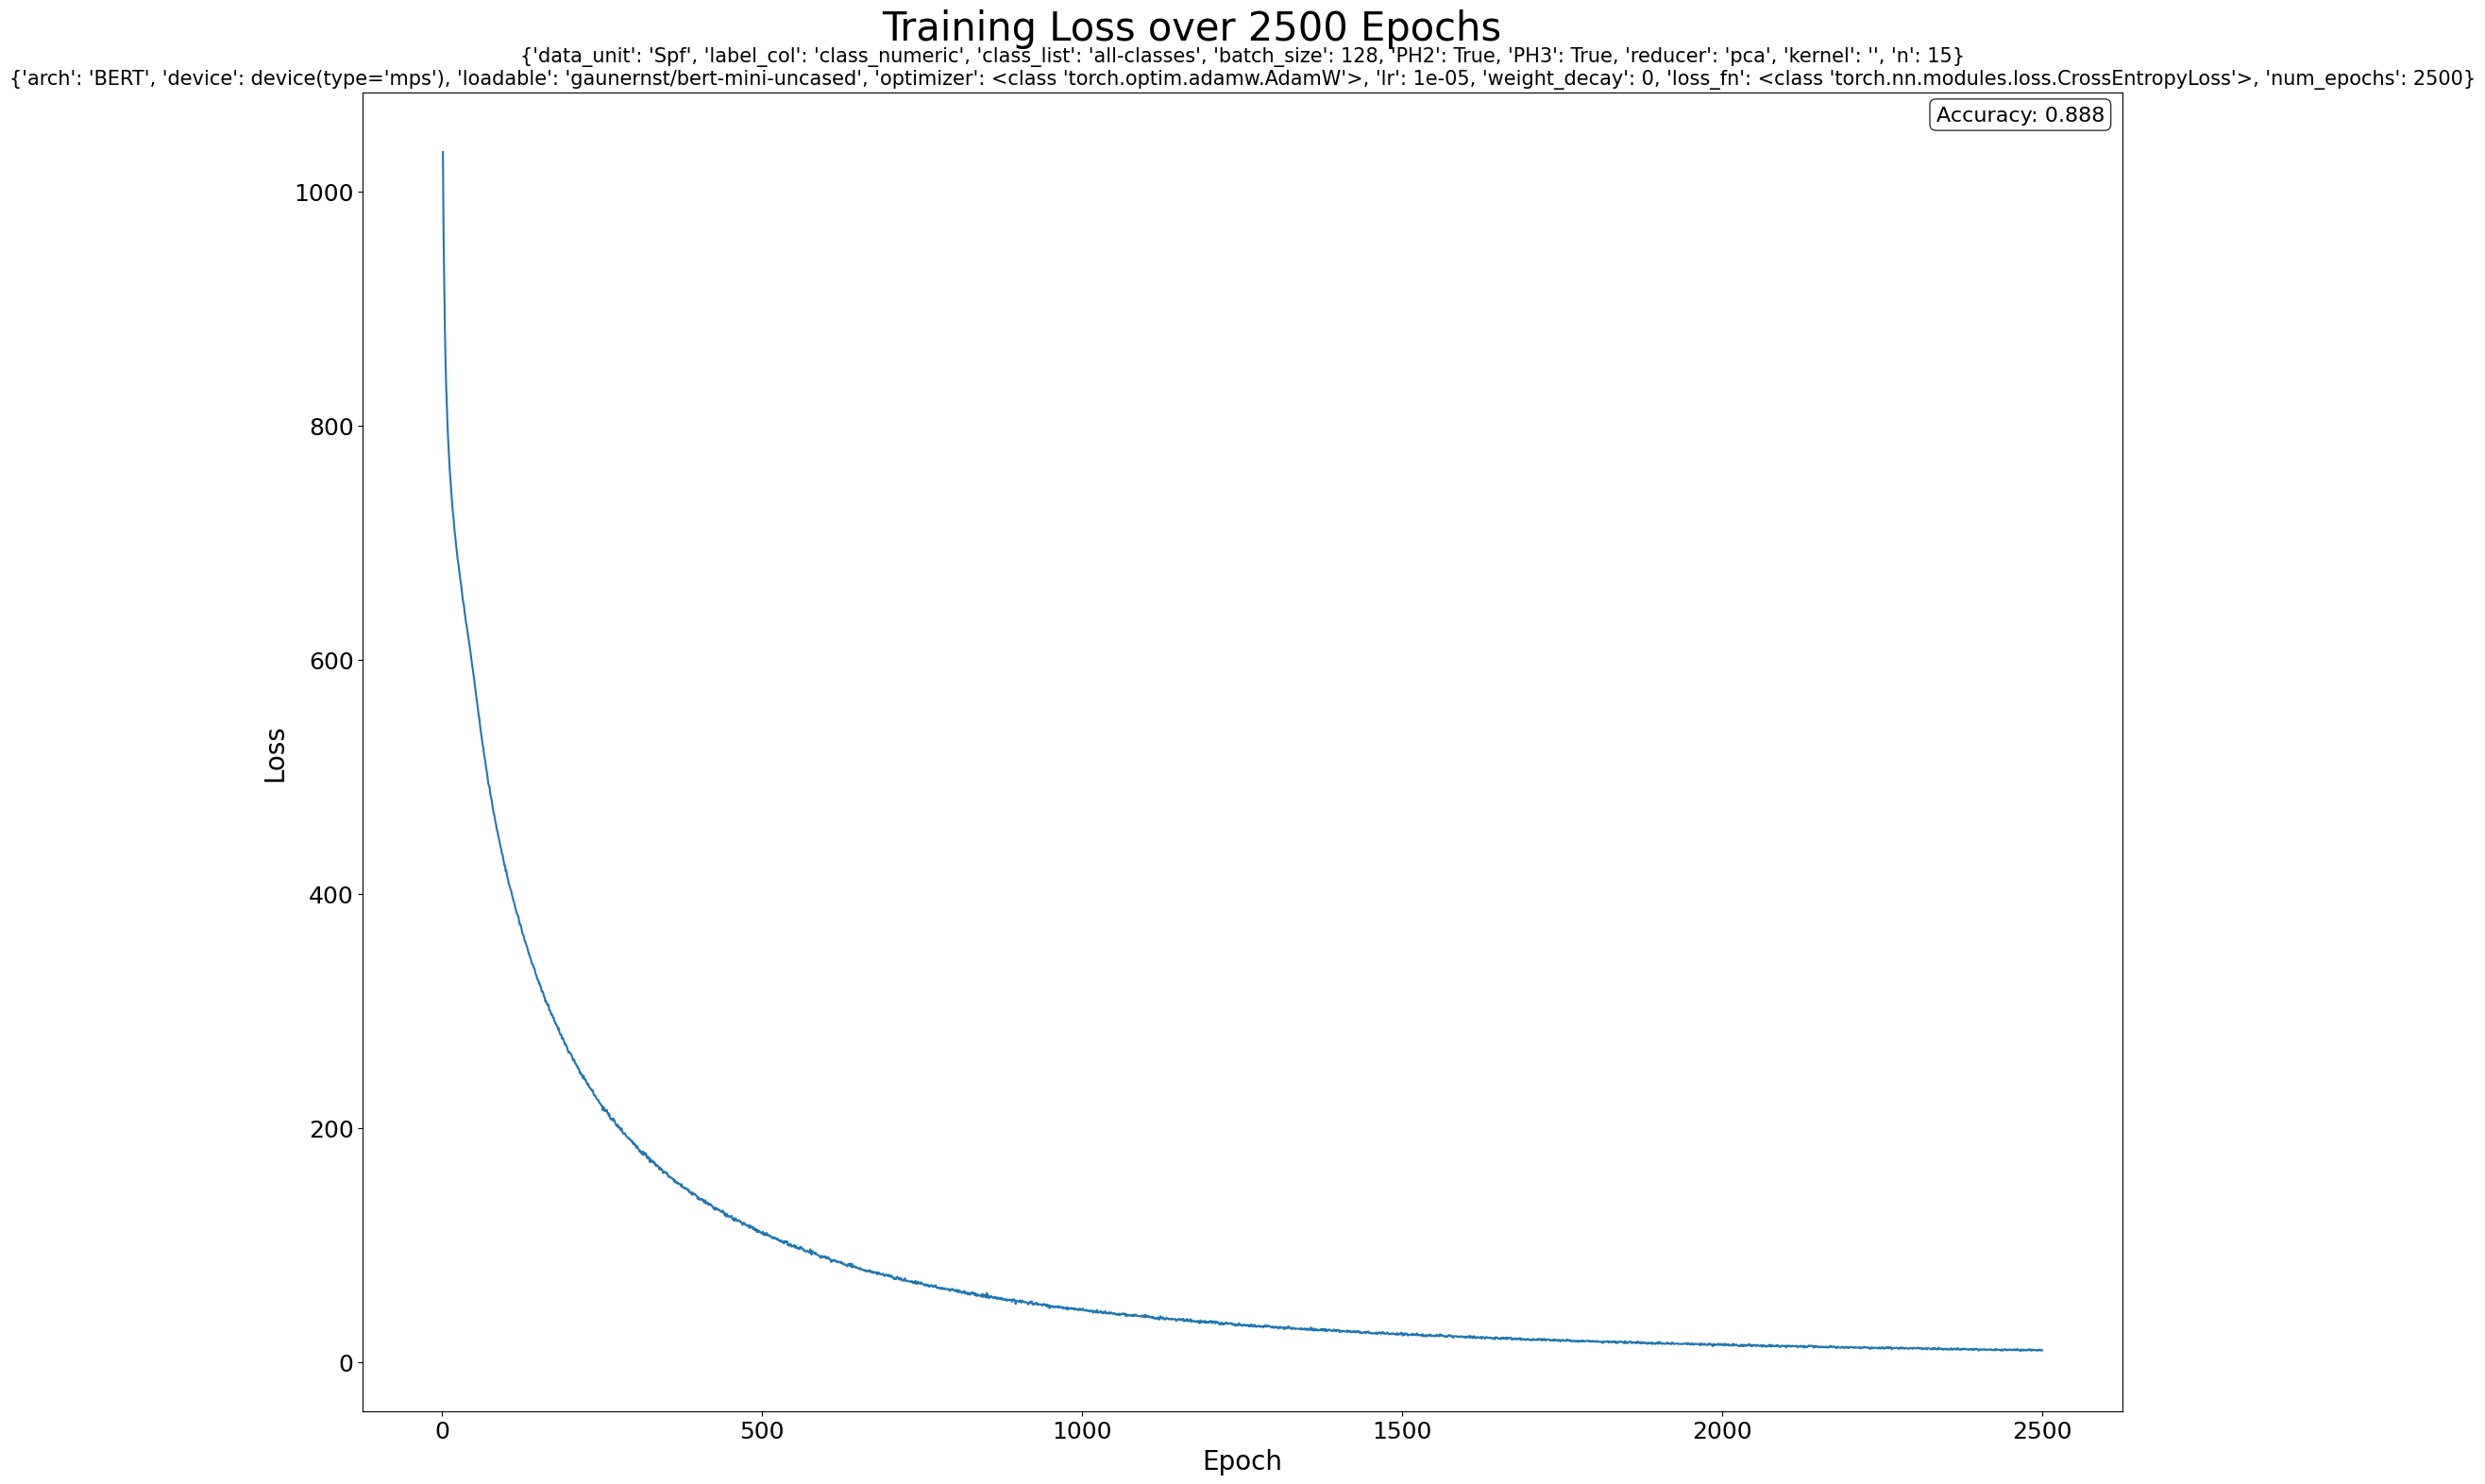

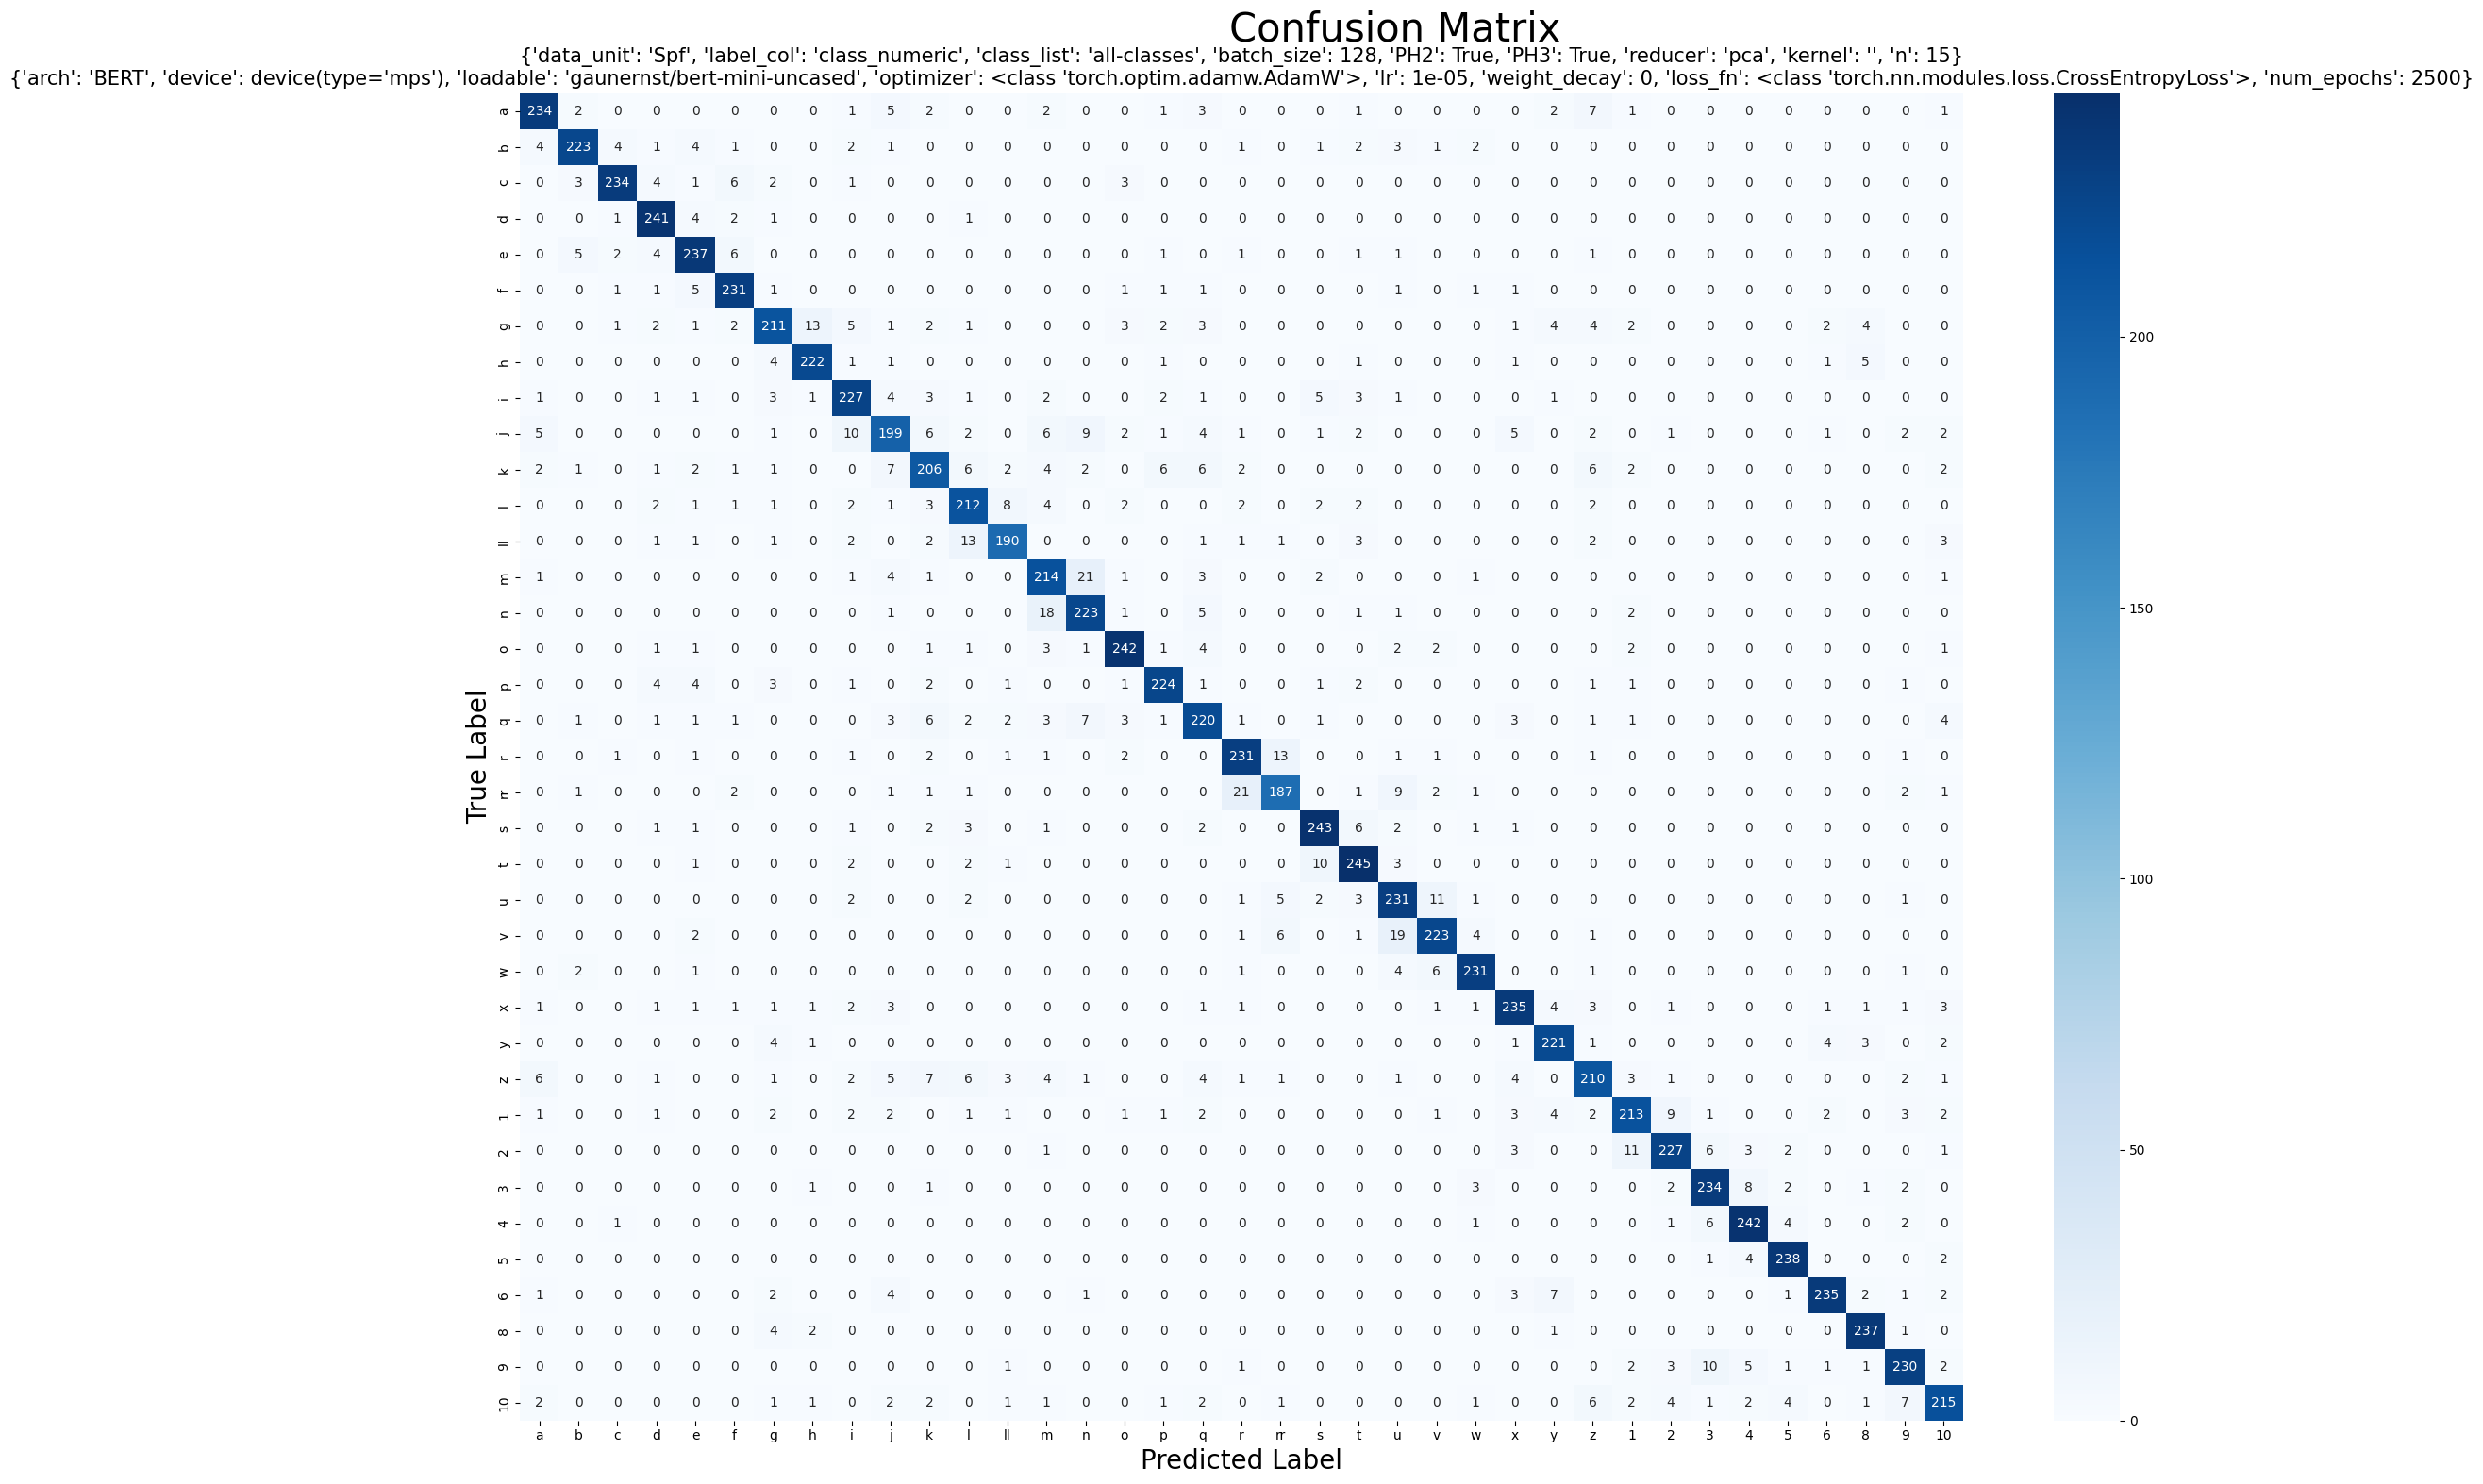

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

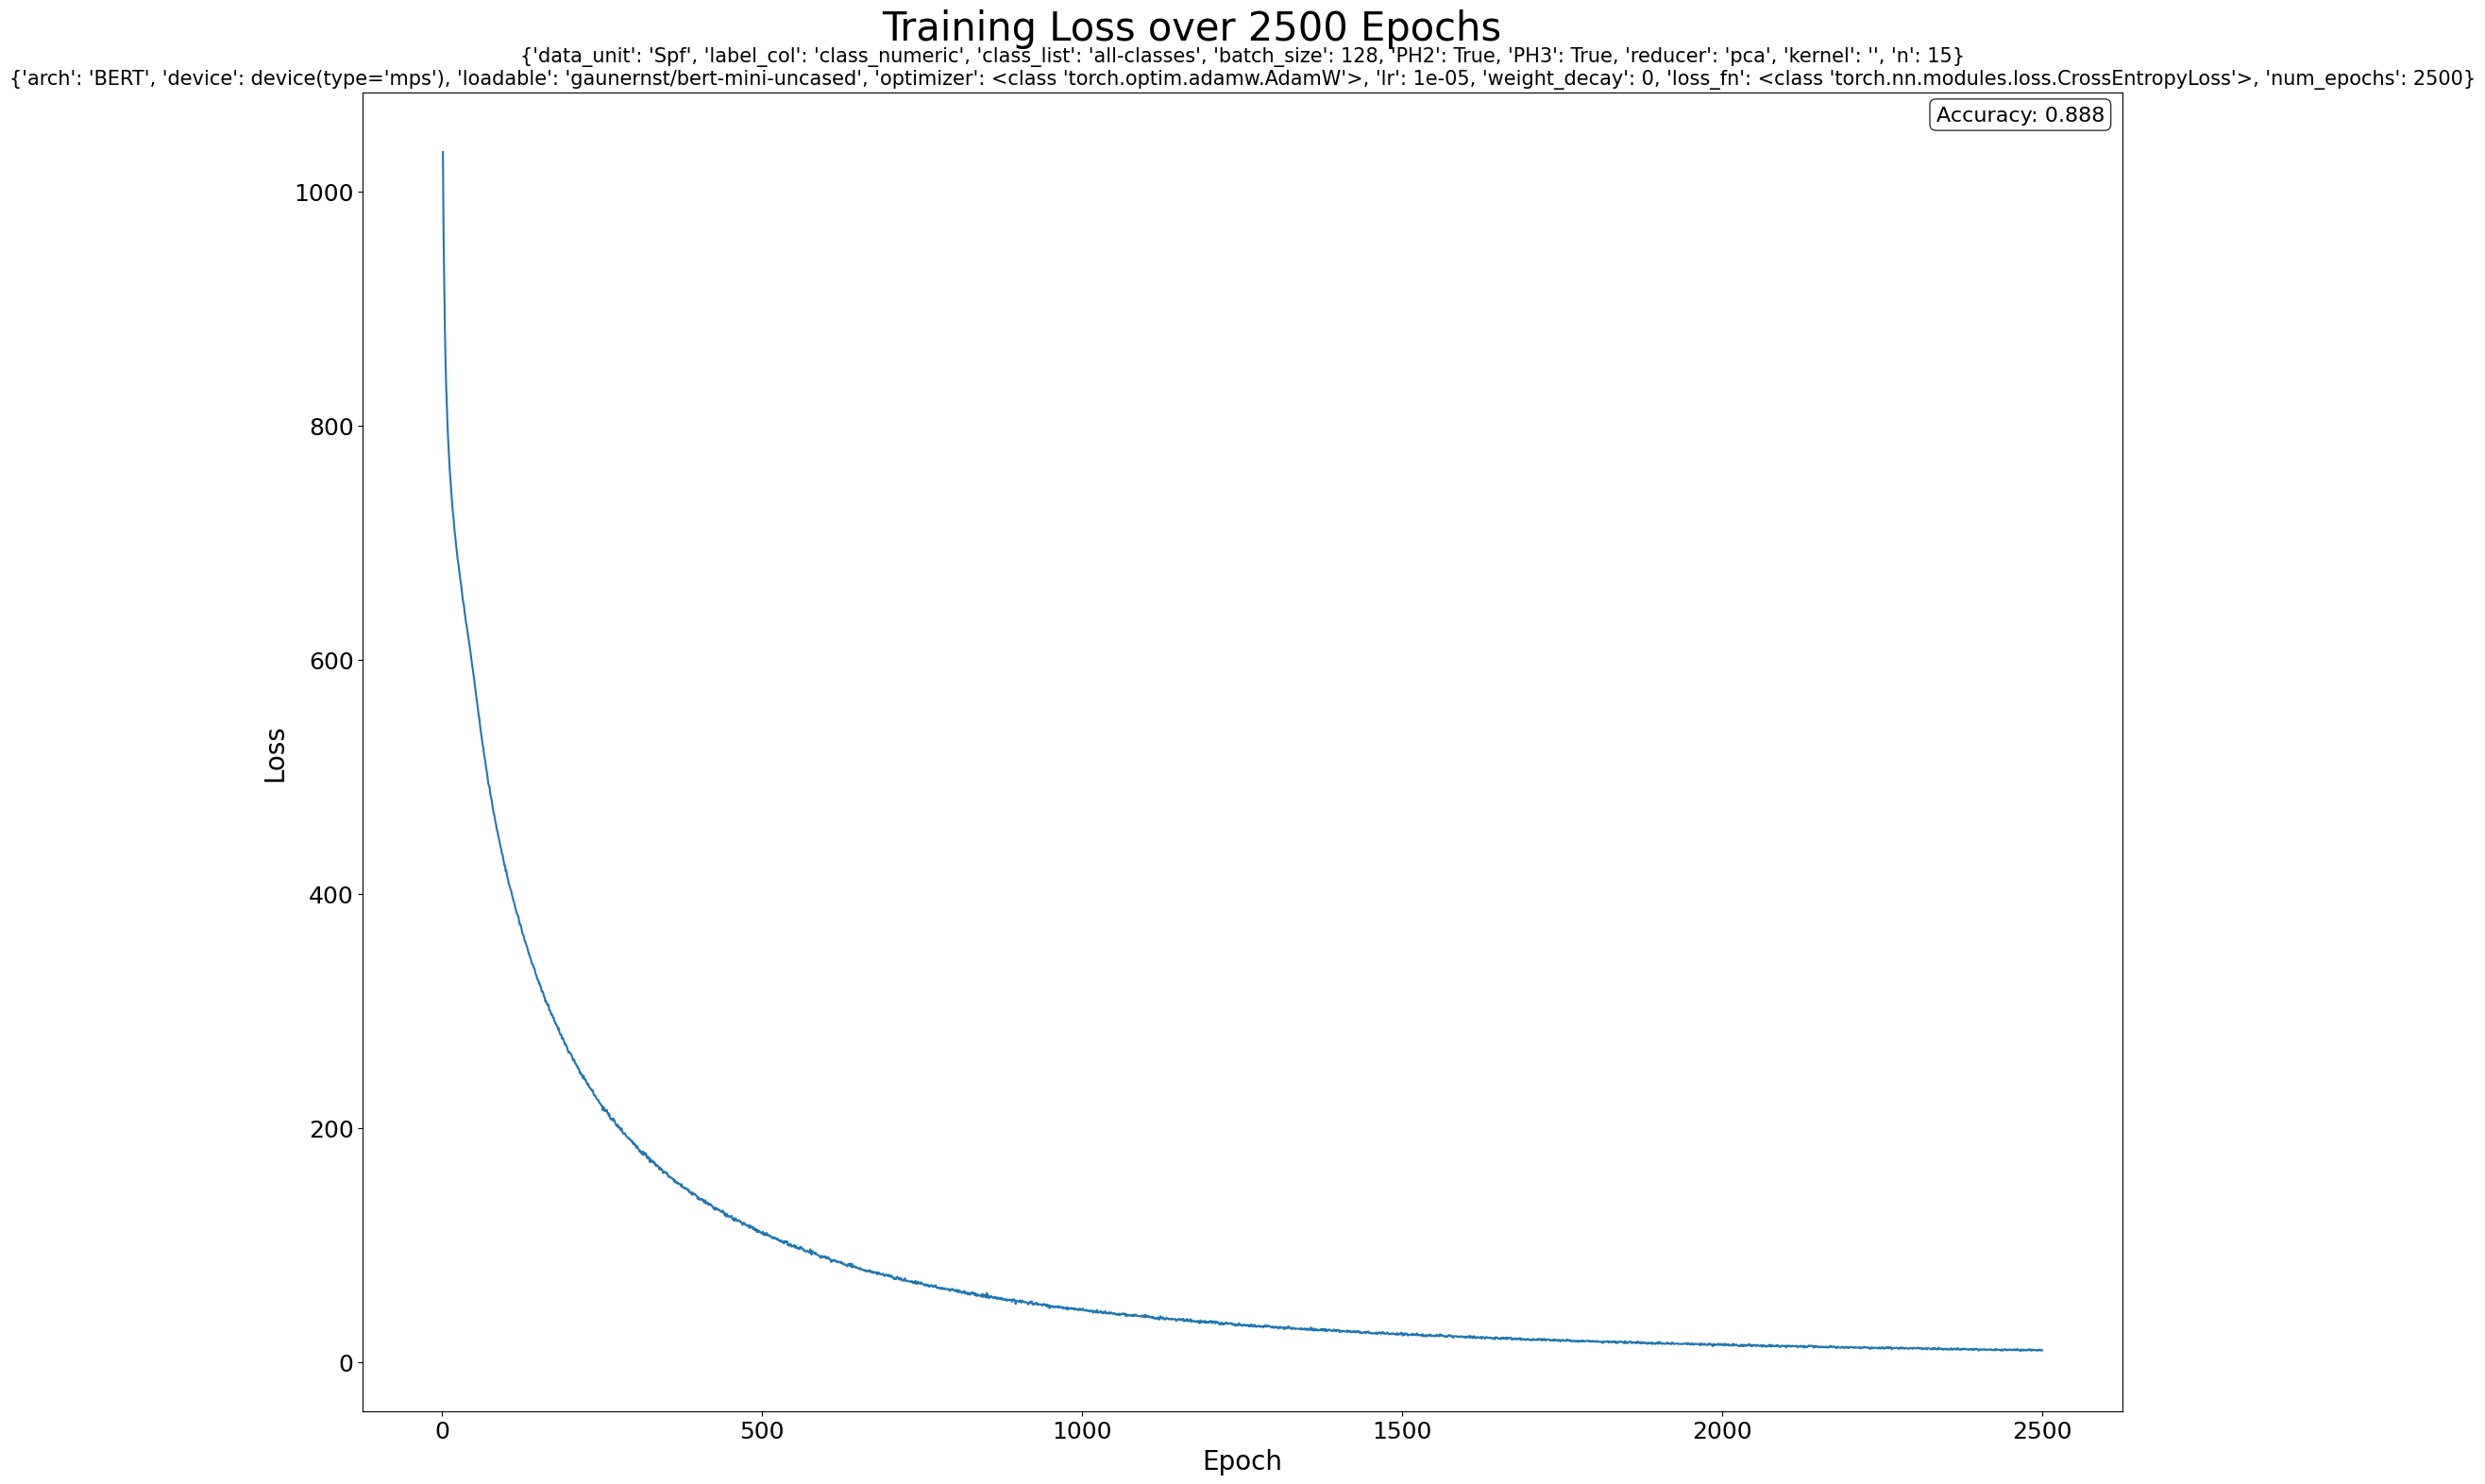

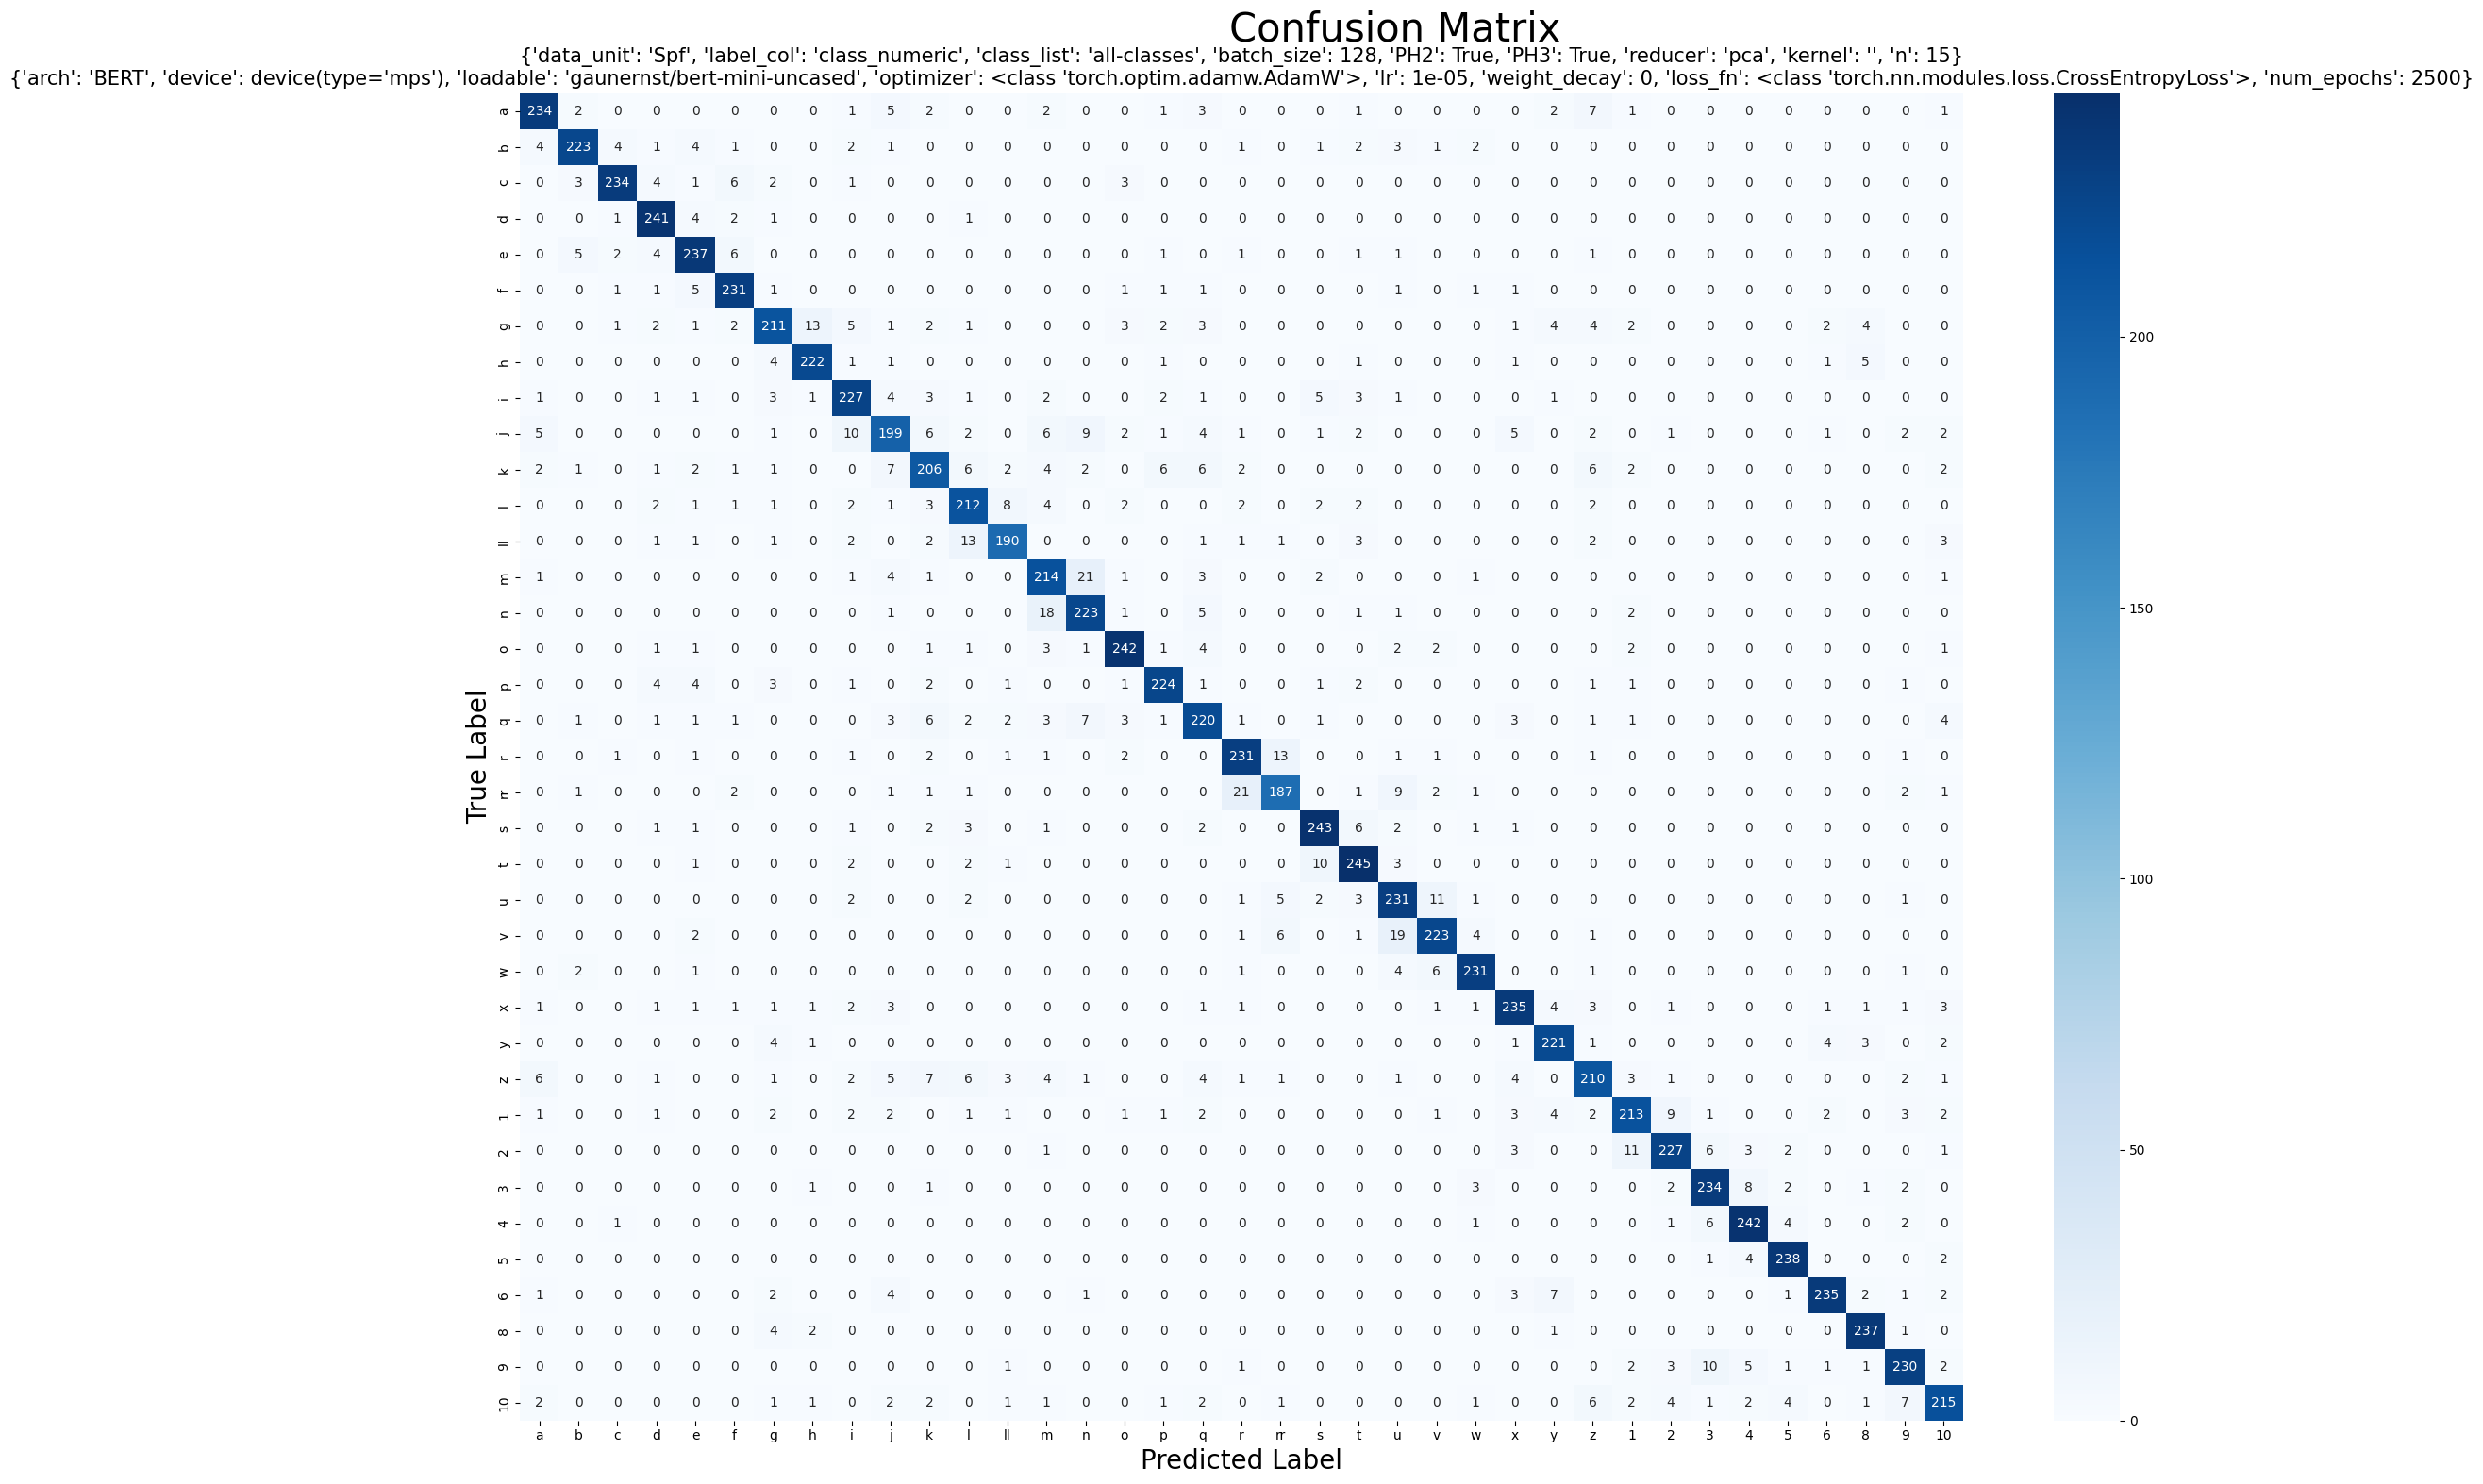

In [10]:
model.keep()
#bert.clean_bert()